# Loan Application Status Prediction

In [1]:
import numpy as np 
import pandas as pd

In [2]:
df=pd.read_csv(r"C:\Users\MANISHA JUDHA\Downloads\Loan Application Status Prediction.txt")

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


##### anaylise data (statistic atribute)

In [4]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
# find the null value 
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
#fill the missing value.
df['LoanAmount']= df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term']= df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mean())

In [8]:
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [9]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Exploratory Data Analysis

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:xlabel='Gender', ylabel='count'>

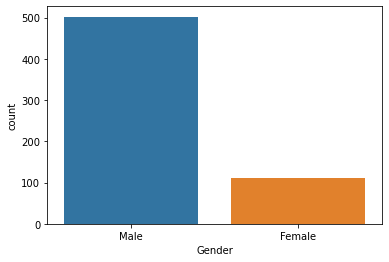

In [11]:
sns.countplot(df['Gender'])

<AxesSubplot:xlabel='Married', ylabel='count'>

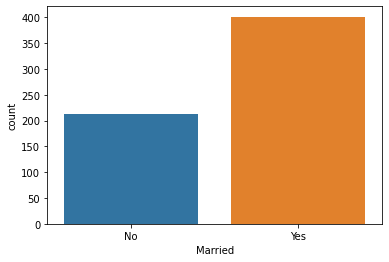

In [12]:
sns.countplot(df['Married'])

<AxesSubplot:xlabel='Dependents', ylabel='count'>

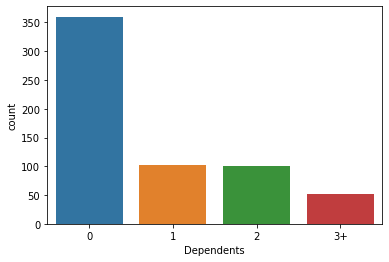

In [13]:
sns.countplot(df['Dependents'])

<AxesSubplot:xlabel='Education', ylabel='count'>

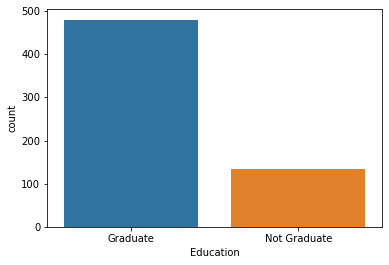

In [14]:
sns.countplot(df['Education'])           

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

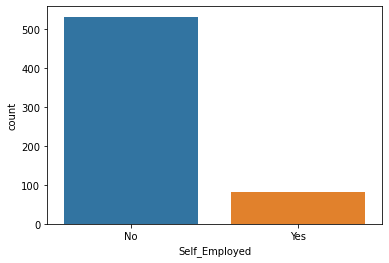

In [15]:
sns.countplot(df['Self_Employed'])       

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

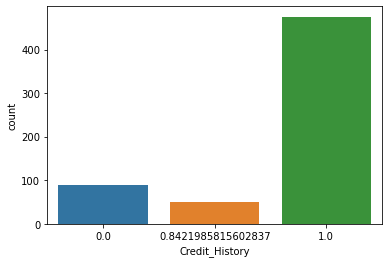

In [16]:
sns.countplot(df['Credit_History'])       

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

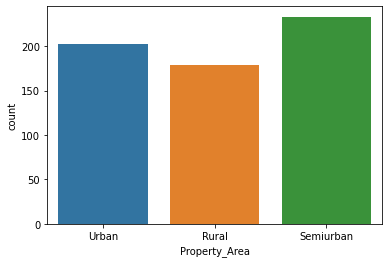

In [17]:
sns.countplot(df['Property_Area'])     

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

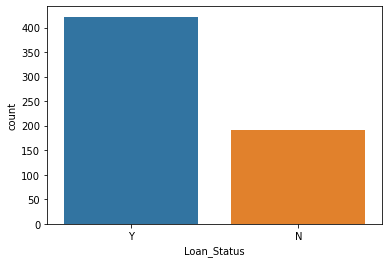

In [18]:
sns.countplot(df['Loan_Status'])          

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

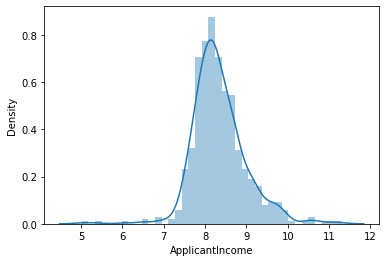

In [19]:
(df['ApplicantIncome'])=np.log(df['ApplicantIncome'])
sns.distplot(df['ApplicantIncome'])

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

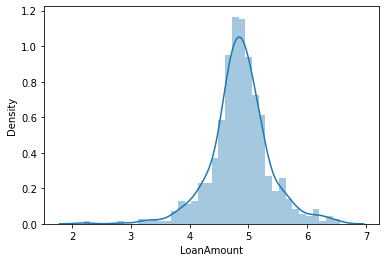

In [20]:
(df['LoanAmount'])=np.log(df['LoanAmount'])
sns.distplot(df['LoanAmount'])

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

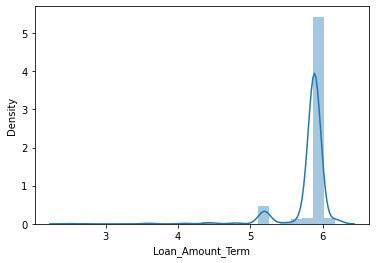

In [21]:
(df['Loan_Amount_Term'])=np.log(df['Loan_Amount_Term'])
sns.distplot(df['Loan_Amount_Term'])

In [22]:
#total income
df['Total_Income']=df['ApplicantIncome']+df['CoapplicantIncome']
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,8.674026,0.0,4.986426,5.886104,1.0,Urban,Y,8.674026
1,LP001003,Male,Yes,1,Graduate,No,8.430109,1508.0,4.852030,5.886104,1.0,Rural,N,1516.430109
2,LP001005,Male,Yes,0,Graduate,Yes,8.006368,0.0,4.189655,5.886104,1.0,Urban,Y,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,7.856707,2358.0,4.787492,5.886104,1.0,Urban,Y,2365.856707
4,LP001008,Male,No,0,Graduate,No,8.699515,0.0,4.948760,5.886104,1.0,Urban,Y,8.699515


In [23]:
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Total_Income
ApplicantIncome,1.000000,-0.237900,0.491066,-0.014618,0.019169,-0.237692
CoapplicantIncome,-0.237900,1.000000,0.204179,-0.042941,-0.001665,1.000000
LoanAmount,0.491066,0.204179,1.000000,0.084534,-0.025248,0.204298
Loan_Amount_Term,-0.014618,-0.042941,0.084534,1.000000,-0.007860,-0.042946
Credit_History,0.019169,-0.001665,-0.025248,-0.007860,1.000000,-0.001660
Total_Income,-0.237692,1.000000,0.204298,-0.042946,-0.001660,1.000000


<AxesSubplot:>

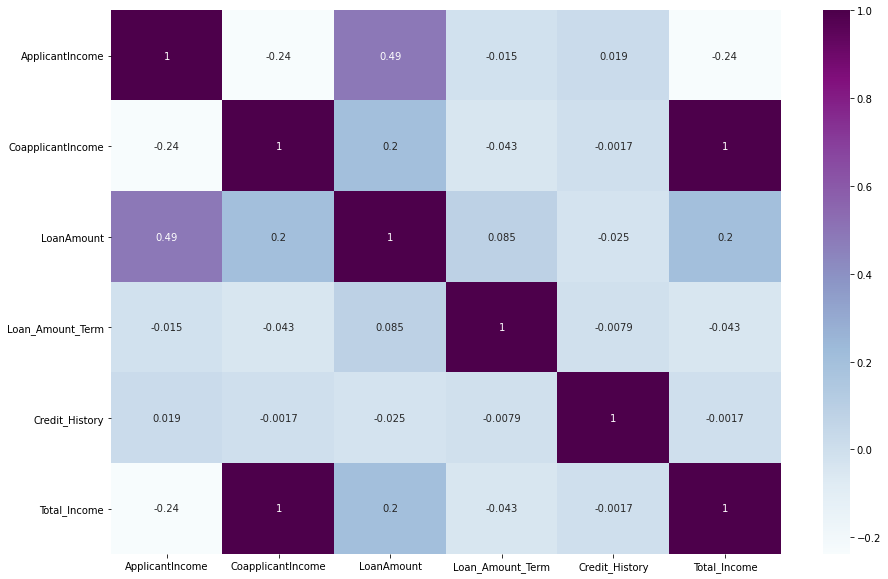

In [24]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True, cmap='BuPu')

In [25]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Total_Income'],
      dtype='object')

In [26]:
colums=['Loan_ID','Dependents']
df=df.drop(columns=colums,axis=1)
df.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,Male,No,Graduate,No,8.674026,0.0,4.986426,5.886104,1.0,Urban,Y,8.674026
1,Male,Yes,Graduate,No,8.430109,1508.0,4.852030,5.886104,1.0,Rural,N,1516.430109
2,Male,Yes,Graduate,Yes,8.006368,0.0,4.189655,5.886104,1.0,Urban,Y,8.006368
3,Male,Yes,Not Graduate,No,7.856707,2358.0,4.787492,5.886104,1.0,Urban,Y,2365.856707
4,Male,No,Graduate,No,8.699515,0.0,4.948760,5.886104,1.0,Urban,Y,8.699515


In [27]:
#conver attribute into numerically 
from sklearn.preprocessing import LabelEncoder
cols=['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status','CoapplicantIncome']
le=LabelEncoder()
for col in cols:
    df[col]=le.fit_transform(df[col])

In [28]:
df.head(10)

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,1,0,0,0,8.674026,0,4.986426,5.886104,1.0,2,1,8.674026
1,1,1,0,0,8.430109,60,4.852030,5.886104,1.0,0,0,1516.430109
2,1,1,0,1,8.006368,0,4.189655,5.886104,1.0,2,1,8.006368
3,1,1,1,0,7.856707,160,4.787492,5.886104,1.0,2,1,2365.856707
4,1,0,0,0,8.699515,0,4.948760,5.886104,1.0,2,1,8.699515
5,1,1,0,1,8.597297,241,5.587249,5.886104,1.0,2,1,4204.597297
6,1,1,1,0,7.754910,61,4.553877,5.886104,1.0,2,1,1523.754910
7,1,1,0,0,8.018296,174,5.062595,5.886104,0.0,1,0,2512.018296
8,1,1,0,0,8.295549,63,5.123964,5.886104,1.0,2,1,1534.295549
9,1,1,0,0,9.460398,282,5.855072,5.886104,1.0,1,0,10977.460398


In [29]:
x = df.drop(columns=['Loan_Status'], axis = 1)
y = df['Loan_Status']


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [32]:
from sklearn.model_selection import cross_val_score
model=LogisticRegression()
#classify function
def classify(model,x,y):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=42)
    model.fit(x_train, y_train)
    print('Acc is',model.score(x_test,y_test)*100)
    #cross validation is use for better validation in model
    score=cross_val_score(model,x,y, cv=5)
    print('cv is,',np.mean(score)*100)

In [33]:
model=LogisticRegression()
classify(model,x,y)

Acc is 78.57142857142857
cv is, 81.27415700386513


In [34]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
classify(model,x,y)

Acc is 68.18181818181817
cv is, 73.2853525256564
